In [97]:
import numpy as np
import pandas as pd
import time

import sns as sns
from matplotlib import pyplot as plt
import gc
import warnings
from datetime import datetime

# 1.源数据的读取

In [98]:
df_origin = pd.read_csv('../UserBehavior.csv')

# 2.源数据补全列名，打印信息

In [99]:
df_origin.columns = ['UserID', 'ItemID', 'CatogoryID', 'BehaviorType', 'TimeStamps']
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150806 entries, 0 to 100150805
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   UserID        int64 
 1   ItemID        int64 
 2   CatogoryID    int64 
 3   BehaviorType  object
 4   TimeStamps    int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ GB


# 3.取百分之一用户的数据便于后续分析

In [100]:

df_Second = df_origin.dropna()
df_Second = df_Second.drop_duplicates(subset=['UserID', 'ItemID', 'TimeStamps'])
# select 1/100 user data
# df_Second = df_Second[df_Second['UserID'] % 100 == 0]
df_Second.to_csv('../UserBehavior-2.csv')


# 4.提高时间信息的可读性

In [101]:
df_Second = pd.read_csv('../UserBehavior-2.csv')
startTime = time.mktime(time.strptime("2017-11-25 00:00:00", "%Y-%m-%d %H:%M:%S"))
endTime = time.mktime(time.strptime("2017-12-3 23:59:59", "%Y-%m-%d %H:%M:%S"))
df_Second = df_Second.loc[(df_Second['TimeStamps'] >= startTime) & (df_Second['TimeStamps'] <= endTime)]


df_Second["time"] = df_Second["TimeStamps"].apply(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))
df_Second['weekday'] = pd.to_datetime(df_Second['time'], format="%Y-%m-%d %H:%M:%S").dt.day_name()
df_Second['date'] = df_Second['time'].str[0:10]
df_Second['date'] = pd.to_datetime(df_Second['date'], format='%Y-%m-%d')
df_Second['time'] = df_Second['time'].str[11:13]
df_Second['time'] = df_Second['time'].astype(int)
df_Second['hour'] = pd.cut(df_Second['time'], bins=[-1, 5, 10, 13, 18, 24], labels=['morning', 'forenoon', 'noon', 'afternoon', 'night'])
df_Second = df_Second.drop(columns=['time'])

df_Second.head()

,Unnamed: 0,UserID,ItemID,CatogoryID,BehaviorType,TimeStamps,weekday,date,hour
0,0,1,2333346,2520771,pv,1511561733,Saturday,2017-11-25,forenoon
1,1,1,2576651,149192,pv,1511572885,Saturday,2017-11-25,forenoon
2,2,1,3830808,4181361,pv,1511593493,Saturday,2017-11-25,afternoon
3,3,1,4365585,2520377,pv,1511596146,Saturday,2017-11-25,afternoon
4,4,1,4606018,2735466,pv,1511616481,Saturday,2017-11-25,night


# 5.数据验证

In [102]:
print(df_Second.duplicated().any())
print(df_Second.isnull().any())
print(df_Second.date.min())
print(df_Second.date.max())

False
Unnamed: 0      False
UserID          False
ItemID          False
CatogoryID      False
BehaviorType    False
TimeStamps      False
weekday         False
date            False
hour            False
dtype: bool
2017-11-25 00:00:00
2017-12-03 00:00:00


BehaviorType
buy     24.140927
cart    26.531741
fav     13.995587
pv      35.331745
Name: UserID, dtype: float64

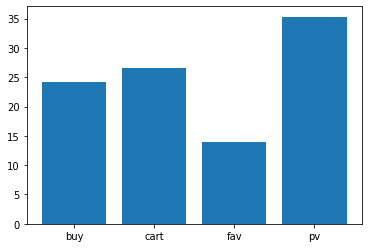

In [103]:
bt_persent = df_Second.groupby(by='BehaviorType')['UserID'].nunique() / df_Second.groupby(by='BehaviorType')['UserID'].nunique().sum()*100
plt.bar(bt_persent.index,bt_persent.values)
bt_persent

# 6.用户行为分析

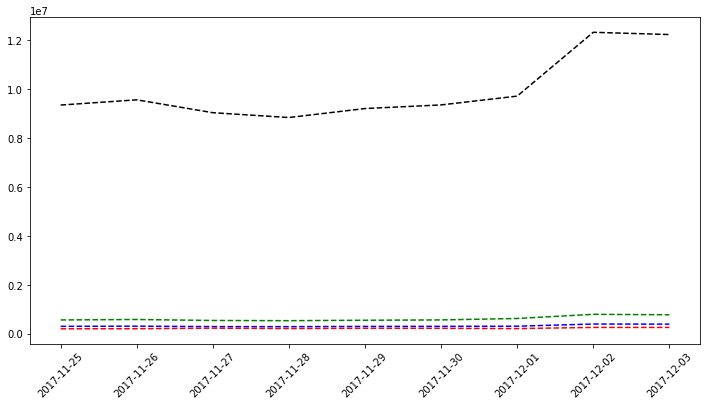

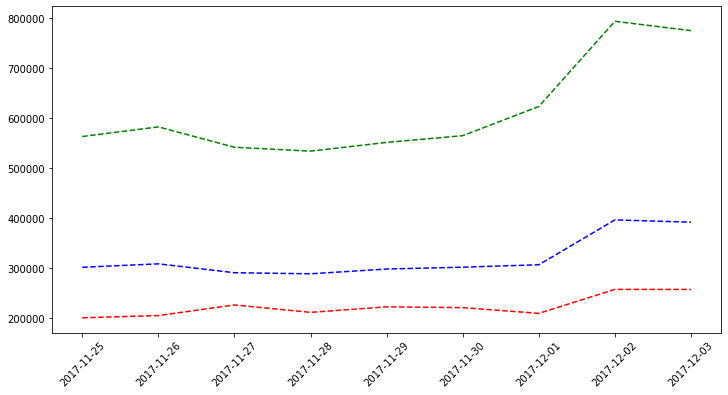

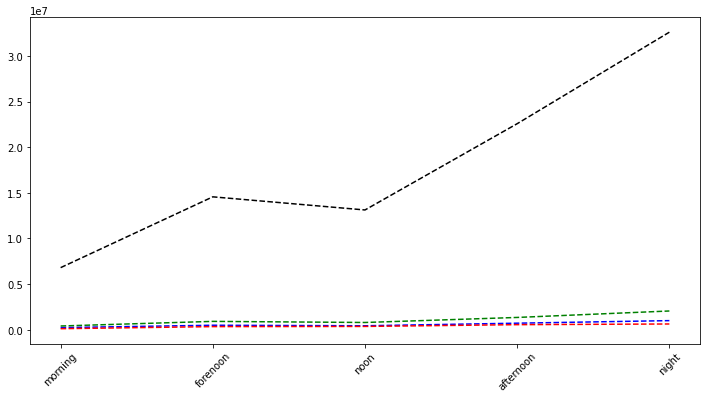

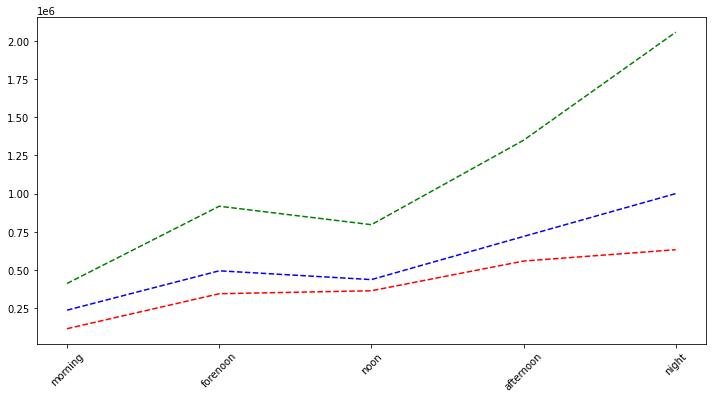

,UserID,MostPvCatogory,MostFavCatogory,MostCartCatogory,MostBuyCatogory
0,1,2355072,0,0,0
1,100,2881542,"223690,2293367,2429887,2881542,3425094,4869428",0,"1029459,2429887,2881542,2951233,3002561,373861..."
2,1000,3579754,1051370,"1051370,1879194",0
3,1000001,4145813,0,0,174239
4,1000004,3607361,0,"1080785,3607361,4756105",0


In [104]:
#把用户行为根据天数分割
day_pv_count = df_Second[df_Second['BehaviorType']=='pv'].groupby(by='date').count()
day_fav_count = df_Second[df_Second['BehaviorType']=='fav'].groupby(by='date').count()
day_cart_count = df_Second[df_Second['BehaviorType']=='cart'].groupby(by='date').count()
day_buy_count = df_Second[df_Second['BehaviorType']=='buy'].groupby(by='date').count()

plt.figure(figsize=(12,6))
plt.plot(list(day_pv_count['BehaviorType'].index),list(day_pv_count['BehaviorType'].values),linestyle='--',color='black')
plt.plot(list(day_fav_count['BehaviorType'].index),list(day_fav_count['BehaviorType'].values),linestyle='--',color='blue')
plt.plot(list(day_cart_count['BehaviorType'].index),list(day_cart_count['BehaviorType'].values),linestyle='--',color='green')
plt.plot(list(day_buy_count['BehaviorType'].index),list(day_buy_count['BehaviorType'].values),linestyle='--',color='red')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(list(day_fav_count['BehaviorType'].index),list(day_fav_count['BehaviorType'].values),linestyle='--',color='blue')
plt.plot(list(day_cart_count['BehaviorType'].index),list(day_cart_count['BehaviorType'].values),linestyle='--',color='green')
plt.plot(list(day_buy_count['BehaviorType'].index),list(day_buy_count['BehaviorType'].values),linestyle='--',color='red')
plt.xticks(rotation=45)
plt.show()
#把用户行为根据时间分割，第二张图不包括点击量的数据
day_pv_count = df_Second[df_Second['BehaviorType']=='pv'].groupby(by='hour').count()
day_fav_count = df_Second[df_Second['BehaviorType']=='fav'].groupby(by='hour').count()
day_cart_count = df_Second[df_Second['BehaviorType']=='cart'].groupby(by='hour').count()
day_buy_count = df_Second[df_Second['BehaviorType']=='buy'].groupby(by='hour').count()

plt.figure(figsize=(12,6))
plt.plot(list(day_pv_count['BehaviorType'].index),list(day_pv_count['BehaviorType'].values),linestyle='--',color='black')
plt.plot(list(day_fav_count['BehaviorType'].index),list(day_fav_count['BehaviorType'].values),linestyle='--',color='blue')
plt.plot(list(day_cart_count['BehaviorType'].index),list(day_cart_count['BehaviorType'].values),linestyle='--',color='green')
plt.plot(list(day_buy_count['BehaviorType'].index),list(day_buy_count['BehaviorType'].values),linestyle='--',color='red')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(list(day_fav_count['BehaviorType'].index),list(day_fav_count['BehaviorType'].values),linestyle='--',color='blue')
plt.plot(list(day_cart_count['BehaviorType'].index),list(day_cart_count['BehaviorType'].values),linestyle='--',color='green')
plt.plot(list(day_buy_count['BehaviorType'].index),list(day_buy_count['BehaviorType'].values),linestyle='--',color='red')
plt.xticks(rotation=45)
plt.show()
#提取每个用户的浏览，收藏，加购物车，购买数据，第二张图不包括浏览的数据

df_user = df_Second['UserID'].drop_duplicates()
df_pv = df_Second.loc[df_Second['BehaviorType']=='pv',['UserID','ItemID', 'CatogoryID']]
df_fav = df_Second.loc[df_Second['BehaviorType']=='fav',['UserID','ItemID', 'CatogoryID']]
df_cart = df_Second.loc[df_Second['BehaviorType']=='cart',['UserID','ItemID', 'CatogoryID']]
df_buy = df_Second.loc[df_Second['BehaviorType']=='buy',['UserID','ItemID', 'CatogoryID']]
#把每个用户最多浏览的商品类数据整理出来

df_pv_count = df_pv.groupby(['UserID','CatogoryID']).ItemID.count().reset_index()
df_pv_count.rename(columns={'ItemID':'CatogoryCounts'},inplace=True)
df_pv_max = df_pv_count.groupby('UserID').CatogoryCounts.max().reset_index()
df_pv_max.rename(columns={'CatogoryCounts':'FavoriteCatogory'},inplace=True)
df_pv_count= pd.merge(df_pv_count,df_pv_max,how='left',on='UserID')
df_pv_count['CatogoryID']=df_pv_count['CatogoryID'].astype(str)
df_pv = df_pv_count.loc[df_pv_count['CatogoryCounts']==df_pv_count['FavoriteCatogory'],'CatogoryID'].groupby(df_pv_count['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,df_pv,how='left',on='UserID')
df_user.rename(columns={'CatogoryID':'MostPvCatogory'},inplace=True)
#把每个用户最多加购物车的商品类数据整理出来

df_fav_count = df_fav.groupby(['UserID','CatogoryID']).ItemID.count().reset_index()
df_fav_count.rename(columns={'ItemID':'CatogoryCounts'},inplace=True)
df_fav_max = df_fav_count.groupby('UserID').CatogoryCounts.max().reset_index()
df_fav_max.rename(columns={'CatogoryCounts':'FavoriteCatogory'},inplace=True)
df_fav_count= pd.merge(df_fav_count,df_fav_max,how='left',on='UserID')
df_fav_count['CatogoryID']=df_fav_count['CatogoryID'].astype(str)
df_fav = df_fav_count.loc[df_fav_count['CatogoryCounts']==df_fav_count['FavoriteCatogory'],'CatogoryID'].groupby(df_fav_count['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,df_fav,how='left',on='UserID')
df_user.rename(columns={'CatogoryID':'MostFavCatogory'},inplace=True)
#把每个用户最多收藏的商品类数据整理出来

df_cart_count = df_cart.groupby(['UserID','CatogoryID']).ItemID.count().reset_index()
df_cart_count.rename(columns={'ItemID':'CatogoryCounts'},inplace=True)
df_cart_max = df_cart_count.groupby('UserID').CatogoryCounts.max().reset_index()
df_cart_max.rename(columns={'CatogoryCounts':'FavoriteCatogory'},inplace=True)
df_cart_count= pd.merge(df_cart_count,df_cart_max,how='left',on='UserID')
df_cart_count['CatogoryID']=df_cart_count['CatogoryID'].astype(str)
df_cart = df_cart_count.loc[df_cart_count['CatogoryCounts']==df_cart_count['FavoriteCatogory'],'CatogoryID'].groupby(df_cart_count['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,df_cart,how='left',on='UserID')
df_user.rename(columns={'CatogoryID':'MostCartCatogory'},inplace=True)
#把每个用户最多购买的商品类数据整理出来

df_buy_count = df_buy.groupby(['UserID','CatogoryID']).ItemID.count().reset_index()
df_buy_count.rename(columns={'ItemID':'CatogoryCounts'},inplace=True)
df_buy_max = df_buy_count.groupby('UserID').CatogoryCounts.max().reset_index()
df_buy_max.rename(columns={'CatogoryCounts':'FavoriteCatogory'},inplace=True)
df_buy_count= pd.merge(df_buy_count,df_buy_max,how='left',on='UserID')
df_buy_count['CatogoryID']=df_buy_count['CatogoryID'].astype(str)
df_buy = df_buy_count.loc[df_buy_count['CatogoryCounts']==df_buy_count['FavoriteCatogory'],'CatogoryID'].groupby(df_buy_count['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,df_buy,how='left',on='UserID')
df_user.rename(columns={'CatogoryID':'MostBuyCatogory'},inplace=True)
df_user = df_user.fillna(0)
#填充空值为0
df_user.head()

# 7.用户操作时间差分析

In [105]:
# find the avarage time to buy items from cart to buy
df_pv = df_Second.loc[df_Second['BehaviorType']=='pv',['UserID','ItemID','TimeStamps']]
df_fav = df_Second.loc[df_Second['BehaviorType']=='fav',['UserID','ItemID','TimeStamps']]
df_cart = df_Second.loc[df_Second['BehaviorType']=='cart',['UserID','ItemID','TimeStamps']]
df_buy = df_Second.loc[df_Second['BehaviorType']=='buy',['UserID','ItemID','TimeStamps']]

buy_cart=pd.merge(df_cart,df_buy,how='inner',on=['UserID','ItemID'],suffixes=('_cart','_buy'))
buy_cart["time"]=buy_cart["TimeStamps_buy"]-buy_cart["TimeStamps_cart"]

buy_cart_time = buy_cart.loc[buy_cart['time']>0,'time'].mean()
print("所有商品从加入购物车到被买下的平均时间",int(buy_cart_time),"s")


所有商品从加入购物车到被买下的平均时间 112577 s


In [106]:
# find the avarage time to buy items from pv to buy
df_pv = df_Second.loc[df_Second['BehaviorType']=='pv',['UserID','ItemID','TimeStamps']]
df_fav = df_Second.loc[df_Second['BehaviorType']=='fav',['UserID','ItemID','TimeStamps']]
df_cart = df_Second.loc[df_Second['BehaviorType']=='cart',['UserID','ItemID','TimeStamps']]
df_buy = df_Second.loc[df_Second['BehaviorType']=='buy',['UserID','ItemID','TimeStamps']]

df_pv=df_pv.groupby(['UserID','ItemID']).TimeStamps.min().reset_index().rename(columns={'TimeStamps':'TimeStamps'})
buy_pv=pd.merge(df_pv,df_buy,how='inner',on=['UserID','ItemID'],suffixes=('_pv','_buy'))
buy_pv["time"]=buy_pv["TimeStamps_buy"]-buy_pv["TimeStamps_pv"]
buy_pv_time = buy_pv.loc[buy_pv['time']>0,'time'].mean()
print("所有商品从第一次浏览到被买下的平均时间",int(buy_pv_time),"s")


所有商品从第一次浏览到被买下的平均时间 59846 s


# 8.用户活跃时间段分析

In [107]:
## 购买时间段
time_buy = df_Second[df_Second['BehaviorType']=='buy'].groupby(['UserID','hour']).ItemID.count().reset_index()
time_buy.rename(columns={'ItemID':'hour_counts'},inplace=True)
time_buy_max = time_buy.groupby('UserID').hour_counts.max().reset_index()
time_buy_max.rename(columns={'hour_counts':'buy_counts_max'},inplace=True)
time_buy = pd.merge(time_buy,time_buy_max,how='left',on='UserID')
time_buy_hour = time_buy.loc[time_buy['hour_counts']==time_buy['buy_counts_max'],['hour','UserID']].groupby(time_buy['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,time_buy_hour,how = 'left',on='UserID')
df_user.rename(columns={'hour':'timeBuy'},inplace=True)

## 购买周几
week_buy=df_Second[df_Second['BehaviorType']=='buy'].groupby(['UserID','weekday']).ItemID.count().reset_index()
week_buy.rename(columns={'ItemID':'week_counts'},inplace=True)
week_buy_max = week_buy.groupby('UserID').week_counts.max().reset_index()
week_buy_max.rename(columns={'week_counts':'week_counts_max'},inplace=True)
week_buy = pd.merge(week_buy,week_buy_max,how='left',on='UserID')
week_buy['weekday']=week_buy['weekday'].astype(str)
week_buy_date=week_buy.loc[week_buy['week_counts']==week_buy['week_counts_max'],'weekday'].groupby(week_buy['UserID']).aggregate(lambda x:','.join(x)).reset_index()
week_buy_date.head()
df_user = pd.merge(df_user,week_buy_date,how = 'left',on='UserID')
df_user.rename(columns={'weekday':'weekBuy'},inplace=True)

## 浏览时间段
time_browser = df_Second[df_Second['BehaviorType']=='pv'].groupby(['UserID','hour']).ItemID.count().reset_index()
time_browser.rename(columns={'ItemID':'hour_counts'},inplace=True)
time_browser_max = time_browser.groupby('UserID').hour_counts.max().reset_index()
time_browser_max.rename(columns={'hour_counts':'browser_counts_max'},inplace=True)
time_browser = pd.merge(time_browser,time_browser_max,how='left',on='UserID')
time_browser_hour = time_browser.loc[time_browser['hour_counts']==time_browser['browser_counts_max'],['hour','UserID']].groupby(time_browser['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,time_browser_hour,how = 'left',on='UserID')
df_user.rename(columns={'hour':'timebrowser'},inplace=True)
time_browser_hour.head()
time_buy_hour.head()
## 购买周几
week_browser=df_Second[df_Second['BehaviorType']=='pv'].groupby(['UserID','weekday']).ItemID.count().reset_index()
week_browser.rename(columns={'ItemID':'week_counts'},inplace=True)
week_browser_max = week_browser.groupby('UserID').week_counts.max().reset_index()
week_browser_max.rename(columns={'week_counts':'week_counts_max'},inplace=True)
week_browser = pd.merge(week_browser,week_browser_max,how='left',on='UserID')
week_browser['weekday']=week_browser['weekday'].astype(str)
week_browser_date=week_browser.loc[week_browser['week_counts']==week_browser['week_counts_max'],'weekday'].groupby(week_browser['UserID']).aggregate(lambda x:','.join(x)).reset_index()
df_user = pd.merge(df_user,week_browser_date,how = 'left',on='UserID')
df_user.rename(columns={'weekday':'weekbrowser'},inplace=True)
df_user = df_user.fillna(0)
df_user.head()


C:\Users\amd yes\AppData\Local\Temp\ipykernel_23892\1152071193.py:7: FutureWarning: ['UserID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  time_buy_hour = time_buy.loc[time_buy['hour_counts']==time_buy['buy_counts_max'],['hour','UserID']].groupby(time_buy['UserID']).aggregate(lambda x:','.join(x)).reset_index()
C:\Users\amd yes\AppData\Local\Temp\ipykernel_23892\1152071193.py:29: FutureWarning: ['UserID'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  time_browser_hour = time_browser.loc[time_browser['hour_counts']==time_browser['browser_counts_max'],['hour','UserID']].groupby(time_browser['UserID']).aggregate(lambda x:','.join(x)).reset_index()


,UserID,MostPvCatogory,MostFavCatogory,MostCartCatogory,MostBuyCatogory,timeBuy,weekBuy,timebrowser,weekbrowser
0,1,2355072,0,0,0,0,0,forenoon,Saturday
1,100,2881542,"223690,2293367,2429887,2881542,3425094,4869428",0,"1029459,2429887,2881542,2951233,3002561,373861...",night,Monday,afternoon,Monday
2,1000,3579754,1051370,"1051370,1879194",0,0,0,night,Thursday
3,1000001,4145813,0,0,174239,forenoon,Sunday,night,Tuesday
4,1000004,3607361,0,"1080785,3607361,4756105",0,0,0,night,Wednesday


# 9.建立用户的RFM模型

In [108]:
df_buy_1 = df_Second[df_Second['BehaviorType']=='buy']
df_buy_1.head()
Near_buy_tstamp = df_buy_1.groupby(by='UserID')['TimeStamps'].max() #得出用户最近购买时间
df_buy_1 = pd.DataFrame(data=Near_buy_tstamp)
diff_time = (endTime - Near_buy_tstamp).astype('int') #用户最近购买时间距离结束时间长短
diff_day = (diff_time/(24*60*60)).astype('int')
df_user['diffDay'] = diff_day
df_user['diffDay'] = df_user['diffDay'].fillna(7)


df_buy_2 = df_Second[df_Second['BehaviorType']=='buy']
df_cart_2 = df_Second[df_Second['BehaviorType']=='cart']

df_user['Frequency'] = df_buy_2['UserID'].value_counts().astype('int')
df_user['Frequency'] = df_user['Frequency'].fillna(0)

df_user['MonetaryValue'] = df_buy_2['UserID'].value_counts().astype('int') / df_cart_2['UserID'].value_counts().astype('int')
df_user['MonetaryValue'] = df_user['MonetaryValue'].fillna(0)

RFM = df_user[['UserID','diffDay','Frequency','MonetaryValue']]
RFM.describe()


,UserID,diffDay,Frequency,MonetaryValue
count,9.879910e+05,987991.000000,987991.000000,987991.000000
mean,5.093853e+05,4.066652,1.979383,0.453879
std,2.938664e+05,2.879880,2.743791,1.045576
min,1.000000e+00,0.000000,0.000000,0.000000
25%,2.549655e+05,1.000000,0.000000,0.000000
50%,5.097150e+05,4.000000,1.000000,0.071429
75%,7.639695e+05,7.000000,3.000000,0.500000
max,1.018011e+06,8.000000,262.000000,78.000000


# 9 对用户进行聚类分析

In [109]:
RFM = RFM.replace(0, 0.01)
RFM_log = RFM[['diffDay','Frequency','MonetaryValue']].apply(np.log,axis=1).round(3)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(RFM_log)
RFM_normalization = scaler.transform(RFM_log)

In [111]:
from sklearn.cluster import KMeans
kc = KMeans(n_clusters=3, random_state=1).fit(RFM_normalization)

cluster_label = kc.labels_
RFM['K-means_label'] = cluster_label
RFM.groupby(['K-means_label']).agg({'diffDay':'mean','Frequency':'mean','MonetaryValue':['mean','count']})


diffDay Frequency MonetaryValue        
                   mean      mean          mean   count
K-means_label                                          
0              7.000000  0.010000      0.010000  335521
1              3.445841  2.620333      0.609604  484401
2              0.010000  4.083567      0.919305  168069

In [112]:
RFM = RFM.drop(columns=['diffDay', 'Frequency', 'MonetaryValue'])
df_user = pd.merge(df_user,RFM,how='left',on='UserID')
df_user.rename(columns={'K-means_label':'UserLevel'},inplace=True)
df_user['UserLevel'] = df_user['UserLevel'].replace(0,'一般用户')
df_user['UserLevel'] = df_user['UserLevel'].replace(1,'发展用户')
df_user['UserLevel'] = df_user['UserLevel'].replace(2,'重要用户')
df_user.head()

,UserID,MostPvCatogory,MostFavCatogory,MostCartCatogory,MostBuyCatogory,timeBuy,weekBuy,timebrowser,weekbrowser,diffDay,Frequency,MonetaryValue,UserLevel
0,1,2355072,0,0,0,0,0,forenoon,Saturday,7.0,0.0,0.000000,一般用户
1,100,2881542,"223690,2293367,2429887,2881542,3425094,4869428",0,"1029459,2429887,2881542,2951233,3002561,373861...",night,Monday,afternoon,Monday,7.0,0.0,0.000000,一般用户
2,1000,3579754,1051370,"1051370,1879194",0,0,0,night,Thursday,1.0,7.0,2.333333,发展用户
3,1000001,4145813,0,0,174239,forenoon,Sunday,night,Tuesday,7.0,0.0,0.000000,一般用户
4,1000004,3607361,0,"1080785,3607361,4756105",0,0,0,night,Wednesday,3.0,4.0,0.307692,发展用户


# 10.商品推荐

In [113]:
user_id=100
user_pv=df_Second[df_Second['UserID']==user_id]['ItemID'].value_counts().reset_index()
user_pv.rename(columns={'ItemID':'pv_counts','index':'ItemID'},inplace=True)

# 获得相似的用户和用户相似度
sim_user=pd.merge(user_pv,df_Second[['UserID', 'ItemID']],how='inner',on=['ItemID'])
sim_user_pv=sim_user.groupby('UserID').sum()['pv_counts'].reset_index()
sim_user_pv.sort_values(by='pv_counts',ascending=False,inplace=True)
sim_user_pv=sim_user_pv.reset_index(drop=True).rename(columns={'pv_counts':'similarity'})
sim_user_pv=sim_user_pv.loc[sim_user_pv['UserID']!=user_id]
sim_user_pv

#根据相似用户计算相似商品
sim_item=pd.merge(sim_user_pv,df_Second[['UserID', 'ItemID']],how='inner',on=['UserID'])
sim_item
sim_item_pv=sim_item.groupby('ItemID').sum()['similarity'].reset_index()
sim_item_pv.sort_values(by='similarity',ascending=False,inplace=True)
sim_item_pv=sim_item_pv.reset_index(drop=True)
sim_item_pv[0:20]

,ItemID,similarity
0,4840649,6461
1,2236861,6320
2,4115850,5785
3,2859169,5263
4,1046201,4595
5,2971043,2504
6,4070623,1923
7,2529362,1818
8,3461635,1535
9,2167765,1448


[[ 0.67231754 -1.35920833 -0.96251611]
 [ 0.67231754 -1.35920833 -0.96251611]
 [-0.15727214  1.13104185  1.66072519]
 ...
 [ 0.67231754 -1.35920833 -0.96251611]
 [ 0.67231754 -1.35920833 -0.96251611]
 [-2.12040701  1.00293708 -0.96251611]]


C:\Users\amd yes\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\amd yes\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


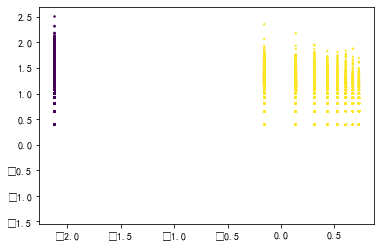

In [130]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
X = RFM_normalization[:987991]
print(X)
Y = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1],X[:, 2], c=Y)
plt.show()

In [120]:
df_user.info

<bound method DataFrame.info of          UserID MostPvCatogory  \
0             1        2355072   
1           100        2881542   
2          1000        3579754   
3       1000001        4145813   
4       1000004        3607361   
...         ...            ...   
987986    99999        2926020   
987987   999990         982926   
987988   999996         873792   
987989   999997        4069500   
987990   999999        4602841   

                                       MostFavCatogory  \
0                                                    0   
1       223690,2293367,2429887,2881542,3425094,4869428   
2                                              1051370   
3                                                    0   
4                                                    0   
...                                                ...   
987986                                               0   
987987                                               0   
987988                               

In [150]:
from pyecharts import options as opts
from pyecharts.charts import Pie, Funnel
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot


jiti = ['一般用户', '发展用户', '重要用户']
num = [335521,484401,168069]
c = (
    Pie()
    .add("客户占比", [list(z) for z in zip(jiti,num)])
    .set_global_opts(title_opts=opts.TitleOpts(title="客户数量占比"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    .render("pie_daishi_user.html")
)

make_snapshot(snapshot,c,'客户数量占比.png')


jiti = ['浏览', '收藏和加购物车', '购买']
num = [100,9.3,2.2]

c = (
    Funnel()
    .add("占比", [list(z) for z in zip(jiti,num)])
    .set_global_opts(title_opts=opts.TitleOpts(title="用户漏斗转换模型"))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{c} %"))
    .render("pie_daishi_trans.html")
)

make_snapshot(snapshot,c,'用户转化比例.png')

In [159]:
import pyecharts.options as opts
from pyecharts.charts import Line
x=['11-25','11-26','11-27','11-28','11-29','11-30','12-01','12-02','12-03']
y1=[9353415, 9567422, 9041186, 8842932, 9210818, 9358998, 9718956, 12329640, 12237300]
y2=[302071, 308954, 291221, 289100, 298587, 302264, 307115, 396749, 392197]
y3=[563376, 582581, 541904, 534157, 551593, 565015, 623346, 793568, 774905]
y4=[201144, 205638, 226834, 211997, 223068, 221459, 210010, 257903, 257754]
line_1=(
    Line()
    .add_xaxis(xaxis_data=x)
    .add_yaxis(series_name="浏览",y_axis=y1)
    .add_yaxis(series_name="收藏",y_axis=y2)
    .add_yaxis(series_name="加购",y_axis=y3)
    .add_yaxis(series_name="购买",y_axis=y4)
    .set_global_opts(title_opts=opts.TitleOpts(title="各行为数量"))
    .render("pie_daishi_1.html")
)
line_2=(
    Line()
    .add_xaxis(xaxis_data=x)
    .add_yaxis(series_name="收藏",y_axis=y2)
    .add_yaxis(series_name="加购",y_axis=y3)
    .add_yaxis(series_name="购买",y_axis=y4)
    .set_global_opts(title_opts=opts.TitleOpts(title="各行为数量"))
    .render("pie_daishi_2.html")
)
make_snapshot(snapshot,line_1,'Day统计_1.png')
make_snapshot(snapshot,line_2,'Day统计_2.png')

In [161]:
import pyecharts.options as opts
from pyecharts.charts import Line
x=['morning','forenoon','noon','afternoon','night']
y1=[6804190, 14561262, 13123245, 22573411, 32598559]
y2=[237015, 494639, 437118, 719497, 999989]
y3=[411727, 917240, 796471, 1348932, 2056075]
y4=[115864, 344675, 364063, 558550, 632655]
line_1=(
    Line()
    .add_xaxis(xaxis_data=x)
    .add_yaxis(series_name="浏览",y_axis=y1)
    .add_yaxis(series_name="收藏",y_axis=y2)
    .add_yaxis(series_name="加购",y_axis=y3)
    .add_yaxis(series_name="购买",y_axis=y4)
    .set_global_opts(title_opts=opts.TitleOpts(title="各行为数量"))
    .render("pie_daishi_3.html")
)
line_2=(
    Line()
    .add_xaxis(xaxis_data=x)
    .add_yaxis(series_name="收藏",y_axis=y2)
    .add_yaxis(series_name="加购",y_axis=y3)
    .add_yaxis(series_name="购买",y_axis=y4)
    .set_global_opts(title_opts=opts.TitleOpts(title="各行为数量"))
    .render("pie_daishi_4.html")
)
make_snapshot(snapshot,line_1,'Hour统计_1.png')
make_snapshot(snapshot,line_2,'Hour统计_2.png')

[6804190, 14561262, 13123245, 22573411, 32598559]
[237015, 494639, 437118, 719497, 999989]
[411727, 917240, 796471, 1348932, 2056075]
[115864, 344675, 364063, 558550, 632655]
